<a href="https://colab.research.google.com/github/dangnha/tensorflow/blob/master/00_Tensorflow_Daniuel_Bourke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ctrl + MM can do this block belowe
# Shift + enter: create a new code block and run previous code block
# Ctrl + M + B: New code block
# Ctrl + Shift + Space: check function (arguments, operation)
# Ctrl + M + Z: Undo the action

#In this notebook, we're going to cover some of the most fundemental concepts of tensors using TensorFlow

More specifically, we're going to cover:
* Introduction to tensors
* Getting information from tensors
* Manupulating tensors
* Tensors & Numpy
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs with TensorFlow (or TPUs)
* Exercise to try for yourself

#Introduction to Tensors

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check the number of dimensions of a tensor(ndim stans for number of dimenstions)
scalar.ndim

0

In [ ]:
# Create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# Check the dimention of our vector
vector.ndim

1

In [ ]:
# create a matrix (has more than 1 demention)
matrix = tf.constant([[10, 7], 
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
# Check the dimention of matrix
matrix.ndim

2

In [ ]:
# Create another matrix
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [8., 9.]], dtype = tf.float16) # specify the data type with dtype parameter
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
# What's the number dementions of another_matrix
another_matrix.ndim

2

In [ ]:
# Let's create a tensor
tensor = tf.constant([[[1,2,3],
                       [4,6,3],],
                      [[7,8,9],
                       [7,6,5]],
                      [[12,13,14],
                       [15,16,17]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  6,  3]],

       [[ 7,  8,  9],
        [ 7,  6,  5]],

       [[12, 13, 14],
        [15, 16, 17]]], dtype=int32)>

In [ ]:
#Check the dimentions of the tensor
tensor.ndim

3

What we've created so far:
* Scalar: a single number
* Vector: a number with direction
* Matrix: a 2-dimensional array of numbers
* Tensor: an n-dimemsionalarray of numbers

### Creating tensors with `tf.Variable`

In [ ]:
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10,7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Let's try to change one of the elements in our changeble tensor
changeable_tensor[1].assign(10)
changeable_tensor
# We can use assign_add to plus the vector elements

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10, 10], dtype=int32)>

###Creating random tensor
Random tensors are tensors of some abitrary size which constain random numbers

In [ ]:
# Create two random tensor
random_1 = tf.random.Generator.from_seed(42) #set seed for reproducibility
random_1 = random_1.normal(shape=(3, 2))
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))
random_1, random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>)

### Shuffle the order of elements in a tensor

In [ ]:
not_shuffled = tf.constant([[10, 7],
                           [3, 4],
                           [2, 5]])
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [ ]:
# Shuffled our non-shuffled tensor
tf.random.set_seed(24)
tf.random.shuffle(not_shuffled, seed=3)
# When we set the global seed and operation 
#seed, they will combine and gennerate a new random sensor

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [10,  7],
       [ 2,  5]], dtype=int32)>

`1:42:04`

### Another way to make sensors

In [ ]:
#Create a tensor of all ones
tf.ones([10, 7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
# Create a tensor of all zeroes
tf.zeros(shape=(3, 4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Turn NumPy arrays into tensors

The main difference between NumPy arrays and TensorFlow tensors is that tensors can be run on a GPU (much faster for numerical computing).

In [ ]:
# You can also turn NumPy array into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # Create a NumPy array between 1 and 25
numpy_A

# x = tf.constant(some+matrix) # Capital for matrix or tensor
# y = tf.constant(vector) # Non-capital for vector



array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
A = tf.constant(numpy_A, shape=(3, 2, 2, 2))
B = tf.constant(numpy_A)
A, B

(<tf.Tensor: shape=(3, 2, 2, 2), dtype=int32, numpy=
 array([[[[ 1,  2],
          [ 3,  4]],
 
         [[ 5,  6],
          [ 7,  8]]],
 
 
        [[[ 9, 10],
          [11, 12]],
 
         [[13, 14],
          [15, 16]]],
 
 
        [[[17, 18],
          [19, 20]],
 
         [[21, 22],
          [23, 24]]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

### Getting information from tensors
When dealing with tensors you probably want to be aware of the following atrributes
* Shape
* Rank
* Axis or dimention
* Size

In [ ]:
# Create a rank 4 tensor
tensor_4 = tf.zeros(shape=(2, 3, 4, 5))
tensor_4

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
tensor_4[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
# Get various attributes of our tensor
print("Datatype of evey element:", tensor_4.dtype)
print("Number of dimentions (rank): ", tensor_4.ndim)
print("Shape of tensor: ", tensor_4.shape)
print("Elements along the 0 axis: ", tensor_4.shape[0])
print("Elements along the last axis: ", tensor_4.shape[-1])
print("Total number of elements in our tensor: ", tf.size(tensor_4).numpy())
# tf.size(tensor_4) will return an output tf.Tensor(numpy() size, shape(), dtype)

Datatype of evey element: <dtype: 'float32'>
Number of dimentions (rank):  4
Shape of tensor:  (2, 3, 4, 5)
Elements along the 0 axis:  2
Elements along the last axis:  5
Total number of elements in our tensor:  120


### Indexing tensors
Tensors can be indexed just like Python lists

In [ ]:
# Get the fist 2 elements of each demension
numpy_4 = np.arange(0, 120, dtype=np.int32)
new_tensor_4 = tf.constant(numpy_4, shape=(2, 3, 4, 5))
new_tensor_4, new_tensor_4[:2, :2, :2, :2]

(<tf.Tensor: shape=(2, 3, 4, 5), dtype=int32, numpy=
 array([[[[  0,   1,   2,   3,   4],
          [  5,   6,   7,   8,   9],
          [ 10,  11,  12,  13,  14],
          [ 15,  16,  17,  18,  19]],
 
         [[ 20,  21,  22,  23,  24],
          [ 25,  26,  27,  28,  29],
          [ 30,  31,  32,  33,  34],
          [ 35,  36,  37,  38,  39]],
 
         [[ 40,  41,  42,  43,  44],
          [ 45,  46,  47,  48,  49],
          [ 50,  51,  52,  53,  54],
          [ 55,  56,  57,  58,  59]]],
 
 
        [[[ 60,  61,  62,  63,  64],
          [ 65,  66,  67,  68,  69],
          [ 70,  71,  72,  73,  74],
          [ 75,  76,  77,  78,  79]],
 
         [[ 80,  81,  82,  83,  84],
          [ 85,  86,  87,  88,  89],
          [ 90,  91,  92,  93,  94],
          [ 95,  96,  97,  98,  99]],
 
         [[100, 101, 102, 103, 104],
          [105, 106, 107, 108, 109],
          [110, 111, 112, 113, 114],
          [115, 116, 117, 118, 119]]]], dtype=int32)>,
 <tf.Tensor: shape=(2, 

In [ ]:
 # Get the first element of each dimenstion from each excep for the final one
 new_tensor_4[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=int32, numpy=array([[[[0, 1, 2, 3, 4]]]], dtype=int32)>

In [ ]:
# Create a rank 2 tensor
rank_2_tensor = tf.constant([[1,2,3,4],
                             [7,8,9,10]])
rank_2_tensor

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[ 1,  2,  3,  4],
       [ 7,  8,  9, 10]], dtype=int32)>

In [ ]:
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 10], dtype=int32)>

In [ ]:
# Add in extra dimension to our rank 2 tensor (first method)
# tf.newaxis
rank3_tensor = rank_2_tensor[..., tf.newaxis]
rank3_tensor

<tf.Tensor: shape=(2, 4, 1), dtype=int32, numpy=
array([[[ 1],
        [ 2],
        [ 3],
        [ 4]],

       [[ 7],
        [ 8],
        [ 9],
        [10]]], dtype=int32)>

In [ ]:
# Add in extra dimension to our rank 2 tensor (first method)
# Alternative to tf.newaxis
# tf.expand_dims(tensor, axis)
tf.expand_dims(rank_2_tensor, axis = 0)

<tf.Tensor: shape=(1, 2, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 7,  8,  9, 10]]], dtype=int32)>

### Manipulating tensor (tensor operating)
**Basic operations**

In [ ]:
# You can add valus to a tensor using the addition operator
tensor = tf.constant([[10, 7],
                      [4,3]])

In [ ]:
# Original tensor is unchanged
tensor + 10, tensor

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[20, 17],
        [14, 13]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 4,  3]], dtype=int32)>)

In [ ]:
# Multiplicatin also works, or subtraction if you wnat
tensor * 10, tensor - 10

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[100,  70],
        [ 40,  30]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 0, -3],
        [-6, -7]], dtype=int32)>)

In [ ]:
# We can use the tensorflow built-in function too
# We have tf.add, or many function
tf.multiply(tensor, 2)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 14],
       [ 8,  6]], dtype=int32)>

**Matrix multiplication**
- In machine learning, matrix multiplication is one of the most common tensor operations
- http://matrixmultiplication.xyz/.

In [ ]:
# Matrix multiplication in tensorflow
# Use tf.linalg.matmul
tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[128,  91],
       [ 52,  37]], dtype=int32)>

In [ ]:
# Matrix multiplication with Python operatpr "@"
# @ pronouce "at"
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[128,  91],
       [ 52,  37]], dtype=int32)>

In [ ]:
tensor.shape

TensorShape([2, 2])

In [ ]:
# Create a tensor (3,2) tensor
X = tf.constant([[1,2],
                 [3,4],
                 [5,6]])
# Create another tensor (2,3)
Y = tf.constant([[7,8,9],
                 [10,11,12]])
# Multiply them
X, Y, X @ Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 7,  8,  9],
        [10, 11, 12]], dtype=int32)>,
 <tf.Tensor: shape=(3, 3), dtype=int32, numpy=
 array([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]], dtype=int32)>)

***There are two rules our tensors need to fulfil if we're going to matix multiply them:***
1. The inner demensions must match
2. The resulting matrix has the shape of the inner demensions


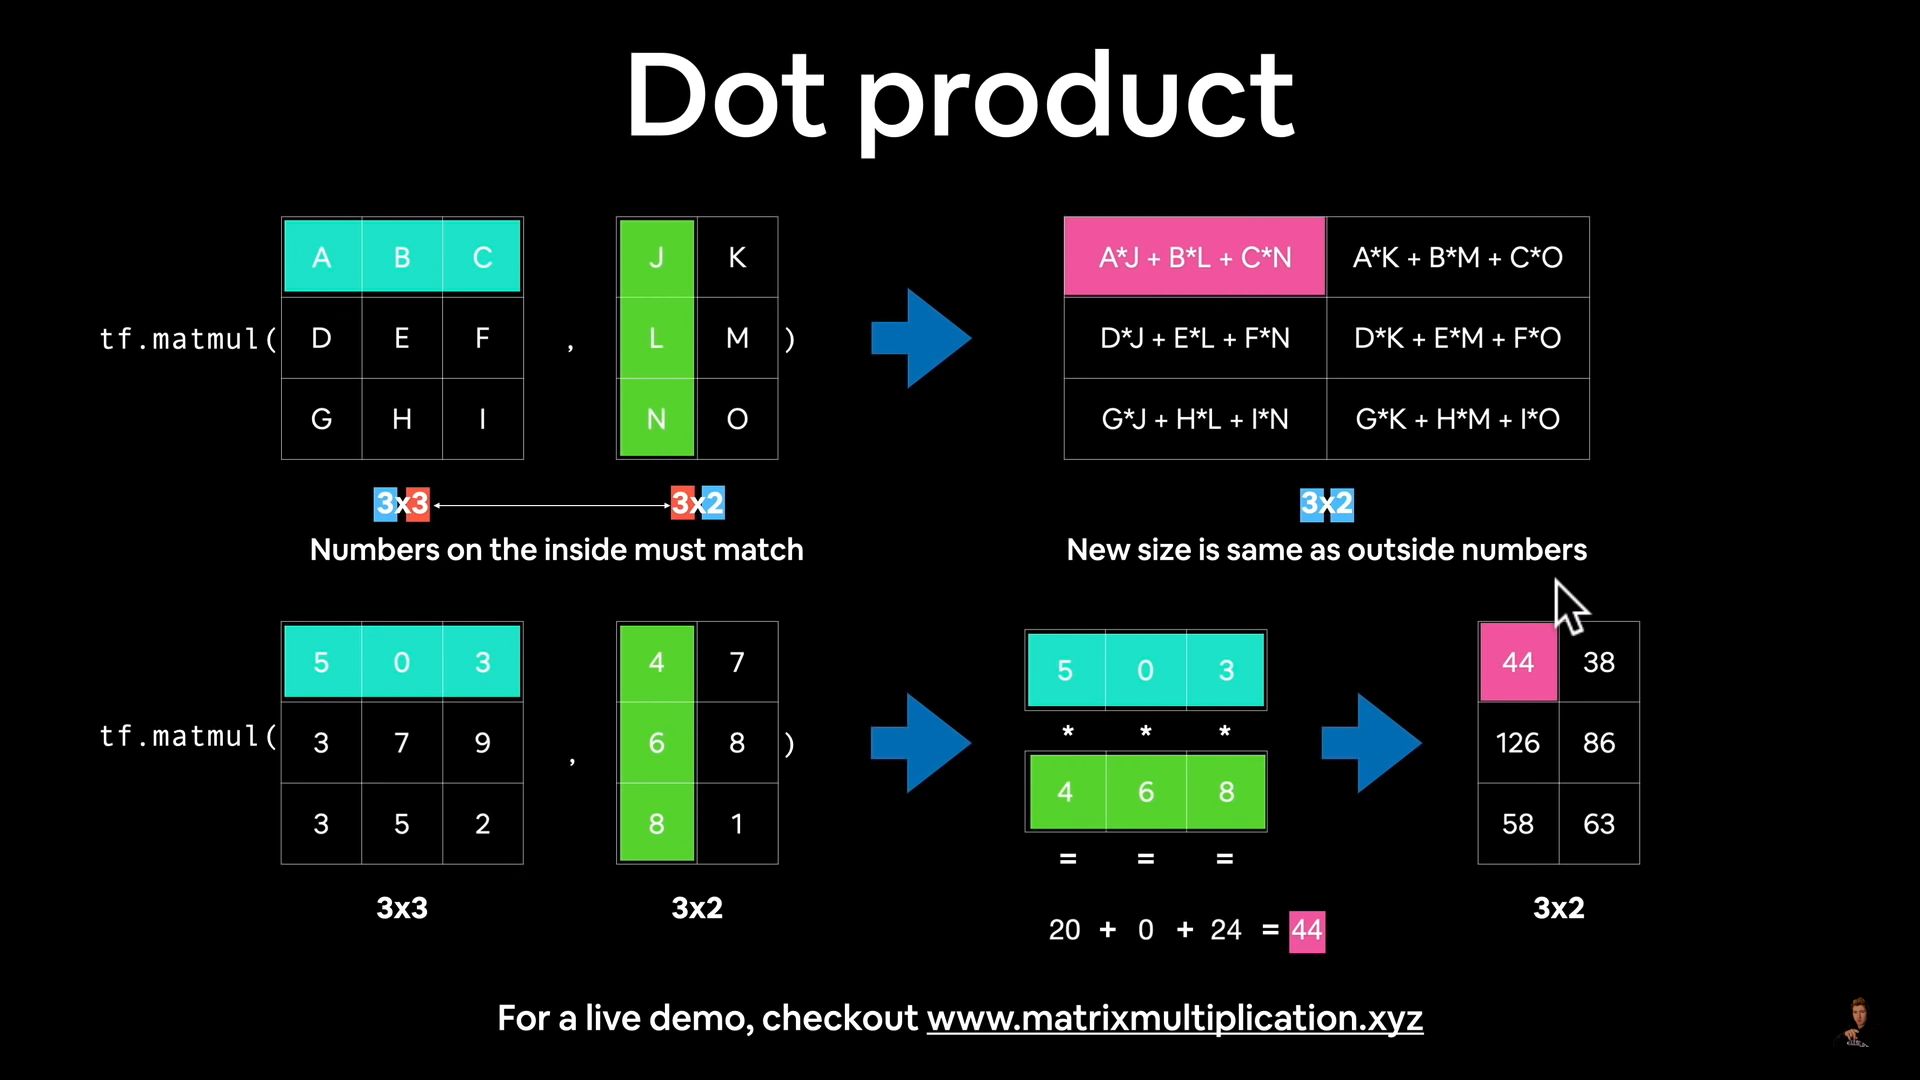

In [ ]:
a = tf.constant([[1,2,3],
                 [3,4,5]])
b = tf.constant([[6,7,8],
                 [9,10,11]])
a,b

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [3, 4, 5]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 6,  7,  8],
        [ 9, 10, 11]], dtype=int32)>)

In [ ]:
# reshape don't change the original tensor
b @ tf.reshape(a, shape=(3,2)), a, b

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 59,  73],
        [ 83, 103]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [3, 4, 5]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 6,  7,  8],
        [ 9, 10, 11]], dtype=int32)>)

In [ ]:
 # Can do the same with transpose
 # The different between trnaspose and reshpae is that tranaspose flips the axises
 a, tf.transpose(a)

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [2, 3, 4]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [2, 3],
        [3, 4]], dtype=int32)>)

**The dot product**

Matrix multiplication is also referred to as the dot product
You can perform matrix multiplication using:
* `tf.matmul()`
* `tf.tesnordot()`

In [ ]:
# Perform the dot product on X and Y (requires X or Y to be transpose)

In [ ]:
tf.tensordot(tf.transpose(a), b, axes=1)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[33, 37, 41],
       [48, 54, 60],
       [63, 71, 79]], dtype=int32)>

In [ ]:
tf.matmul(a, tf.transpose(b))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 44,  62],
       [ 86, 122]], dtype=int32)>

In [ ]:
 tf.matmul(a, tf.reshape(b, shape=(3, 2)))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 52,  58],
       [100, 112]], dtype=int32)>

### Changing the datatype of a tensor

In [ ]:
# Create a new tensor with the default datatype (float32)
B = tf.constant([1.7, 4.5])
B.dtype

tf.float32

In [ ]:
C = tf.constant([1,2])
C.dtype

tf.int32

In [ ]:
# Change from float32 to float16 (reduce precision)
D = tf.cast(B, dtype=tf.float16)
D, B

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 4.5], dtype=float16)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 4.5], dtype=float32)>)

In [ ]:
E = tf.cast(C, dtype=tf.float32)
E, C

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>)

In [ ]:
E_float16 = tf.cast(E, dtype=tf.float16)
E_float16

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1., 2.], dtype=float16)>

###Aggregating tensors

Aggregationg tensors = condensing them from multiple values down to smaller amount of values.

In [ ]:
# Getting the absolute values
D = tf.constant([-7, -10])
D, tf.abs(D)

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>)

Let's go through the following forms of aggregation:
* Get the minimum
* Get the maximum
* Get the mean of tensor
* Get the sum of tensor

In [ ]:
# creating a random tensorwith values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([61, 33, 34, 18, 37,  3, 27, 12, 93, 62,  3, 41, 36, 65,  4,  8, 47,
        8, 35, 48, 15, 27, 48, 45, 42,  4, 21, 90, 29, 42, 44, 34, 88, 40,
       66, 92, 83, 70, 17, 58, 45, 49, 88, 25, 41, 85, 40, 86, 73, 79])>

In [ ]:
tf.size(E).numpy(), E.shape, E.ndim

(50, TensorShape([50]), 1)

In [ ]:
# Find the minimun
tf.reduce_min(E).numpy()

3

In [ ]:
# Find the maximum
tf.reduce_max(E).numpy()

93

In [ ]:
# Find the mean
tf.reduce_mean(E).numpy()

44

In [ ]:
# Find the sum
tf.reduce_sum(E).numpy()

2241

In [ ]:
# Find the variance
import tensorflow_probability as tfp
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=697>

In [ ]:
# Fidn the variance by tf
tf.math.reduce_variance(E)

<tf.Tensor: shape=(), dtype=float32, numpy=697.1877>

In [ ]:
# Find the standard deviation
E = tf.cast(E, dtype=tf.float32)
tf.math.reduce_std(E)

<tf.Tensor: shape=(), dtype=float32, numpy=26.404312>

In [ ]:
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
# Find the positional maximum and minimum
tf.argmax(F).numpy()

42

In [ ]:
F[tf.argmax(F).numpy()] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Find the positional maximum and minimum
tf.argmin(F).numpy()

16

### Squeezing a tensor (removing all single dimensions)

In [ ]:
# Create a tensor to het started
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [ ]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>,
 TensorShape([50]))

### One-hot encoding tensor

In [ ]:
# Create a list of indices
some_list = [0, 1, 2, 3] # red, green, blue, purple
# One=hot encode our list of indices
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
# Specify custom values for one hot encoding
tf.one_hot(some_list, depth=4, on_value="ok", off_value="no")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'ok', b'no', b'no', b'no'],
       [b'no', b'ok', b'no', b'no'],
       [b'no', b'no', b'ok', b'no'],
       [b'no', b'no', b'no', b'ok']], dtype=object)>

### Squaring, log, square root

In [ ]:
# Create a new tensor
H = tf.range(1, 10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
# Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [ ]:
# Find the square root
tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [ ]:
# Find the logt
tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensors and NymPy

Tensorflow interact with NumPy arrays

In [ ]:
#Create a tensor directory from a NumPy array
J = tf.constant(np.array([3., 7., 6., 8., 2.]))
J

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([3., 7., 6., 8., 2.])>

In [ ]:
# Conver our tensor back to numpy array
np.array(J), J

(array([3., 7., 6., 8., 2.]),
 <tf.Tensor: shape=(5,), dtype=float64, numpy=array([3., 7., 6., 8., 2.])>)

In [ ]:
# Convert tensor to a NumPy array
J.numpy(), J

(array([3., 7., 6., 8., 2.]),
 <tf.Tensor: shape=(5,), dtype=float64, numpy=array([3., 7., 6., 8., 2.])>)

In [ ]:
# The default types of each are slightly different
numpy_J = tf.constant(np.array([1.,2.,3.,4.,5.]))
tensor_J = tf.constant([1.,2.,3.,4.,5.])
# Check data type
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)